<a href="https://colab.research.google.com/github/Helm110/ASTRON-1221/blob/main/CalculateRotationalCurveForGalaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [900]:
import numpy as np # Import numpy to use in calculations
import astropy.constants as const #Package contains the astonomy constants used later
import astropy.units as u # import a Python package to call certain units, e.g., mass of the sun
import math #Import math to use in calculations

In [901]:
def calcOrbitV(M,r):
    """
    This is the function to calculate orbital velocity
    Input:
    M, the mass of the central object
    r, the distance between the two objects
    Output:
    orbitialVelocity, the orbital velocity
    """
    G = const.G
    orbitalVelocity =  np.sqrt(G * M / r)

    """
    This Section is useful for finding the units and general bug fixing
    print("Current G:")
    print(G)
    print("Current M:")
    print(M)
    print("Current r:")
    print(r)
    print("Function result:")
    """

    return orbitalVelocity



In [902]:
#Defining the inputs M & r in respects to Earth
M = 1*u.M_earth
r = 1*u.earthRad
#Print out the constants to verify units
print(M)
print(r)

#Runs computation of OrbitalVelocity function
v_earthSatalite = calcOrbitV(M,r)
print(v_earthSatalite.to(u.km/u.s))

1.0 earthMass
1.0 earthRad
7.905388234385281 km / s


In [903]:
#Defining an array and it's applications
# Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune

orbital_distance_au = [0.39, 0.72, 1, 1.52, 5.20, 9.58, 19.2, 30.1]* u.au

In [904]:
# Define orbital Velocities for all planets using the mass of the sun
M_sun = 1*u.M_sun
v_planet_arr = calcOrbitV(M_sun,orbital_distance_au)
print(v_planet_arr.to(u.km/u.s))

[47.69367714 35.10159595 29.78469183 24.15857518 13.06145141  9.62299713
  6.79739483  5.42887526] km / s


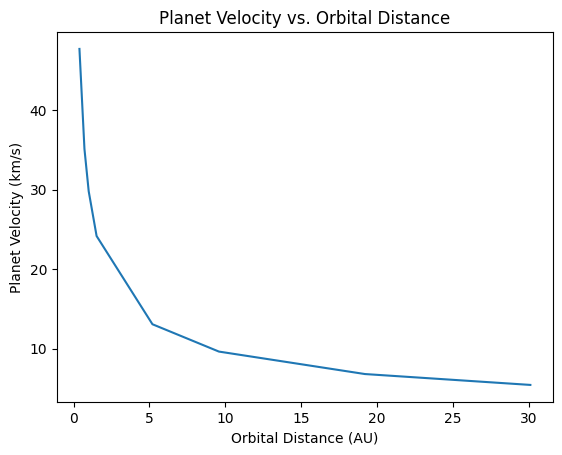

In [905]:
# prompt: Could you help me plot v_planet_arr and orbital.distance.au?
# This code is all the nessasary parts to create the orbital velocity graphs

import matplotlib.pyplot as plt #Import to plot graphs

plt.plot(orbital_distance_au, v_planet_arr.to(u.km/u.s)) #plots information
plt.xlabel('Orbital Distance (AU)') # Add x axis label
plt.ylabel('Planet Velocity (km/s)') # Add y axis label
plt.title('Planet Velocity vs. Orbital Distance') # Add title
plt.show() # Displays graph

In [906]:
#making a graph which x is kilo parsects
M_SagA = 8.54e36  # Mass of Sagittarius A* (kg)
print("Sagitarius A has a mass of approximatley" ,float(M_SagA), "kg")

#Creates an array used for orbital radius in all folowing graphs
orbital_distance = np.arange(1,30,.1)* u.kpc
#print(orbital_distance.to(u.km))

# Calcuating the orbital velocity in regards to Sagitarius A
v_blackhole_kParsects = calcOrbitV(M_SagA,orbital_distance)
#print(v_blackhole_kParsects)

Sagitarius A has a mass of approximatley 8.54e+36 kg


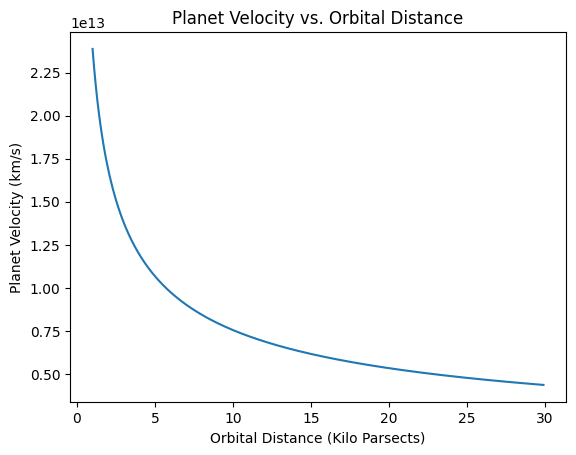

In [907]:
#Plot the results from the Black hole Orbital
plt.plot(orbital_distance, v_blackhole_kParsects)
plt.xlabel('Orbital Distance (Kilo Parsects)') # Add x axis label
plt.ylabel('Planet Velocity (km/s)') # Add y axis label
plt.title('Planet Velocity vs. Orbital Distance') # Add title
plt.show() # Displays graph

In [908]:
#making a graph which x is kilo parsects
M_Bulge = 1e10 * u.M_sun  # Mass of Bulge in earth units

# Calculate orbital velocities with the buldge
v_Bulge_kParsects = calcOrbitV(M_Bulge,orbital_distance)
#print(v_Bulge_kParsects.to(u.km/u.s))

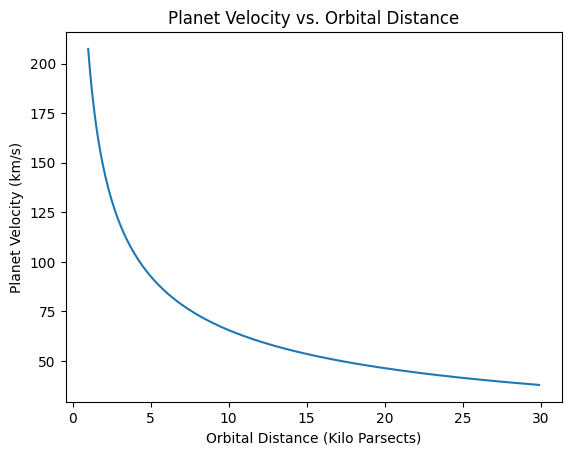

In [909]:
#Plotting a graph for orbital velocity including Bulge mass
plt.plot(orbital_distance.to(u.kpc), v_Bulge_kParsects.to(u.km/u.s))
plt.xlabel('Orbital Distance (Kilo Parsects)') # Add x axis label
plt.ylabel('Planet Velocity (km/s)') # Add y axis label
plt.title('Planet Velocity vs. Orbital Distance') # Add title
plt.show() # Displays graph

In [910]:
#Define radius & mass of total Disk
M_Disk = 1e11 * u.solMass
R_Disk = 10 * u.kpc
#Define variable for the density relating to volume
densityOfDisk = M_Disk / (np.pi * (R_Disk)**2)
print(densityOfDisk)

#Define a function to calculate the denisty enclosed of just the Disk
def Calc_Enclosed_Mass_Disk(r, density=318 * 1e6 * u.solMass/u.kpc**2):
  """
  Radius of the black hole: 0<r<.2
  Radius of bulge: .2<r<1
  Radius of disk: 1<r<30
  Radius of halo: 1<r<30 *not used but good to think ahead*
  """
  if r < 10 * u.kpc:
    M = np.pi * density * (r**2)
  else:
    R = 10 * u.kpc
    M = np.pi * density * (R**2)
  return (M)

318309886.1837907 solMass / kpc2


In [911]:
# Printing out results to check if the code is correct
print("The mass at 1 kpc is ", Calc_Enclosed_Mass_Disk(1 * u.kpc).to(1e6 * u.solMass))
print("The mass at 1 kpc is ", Calc_Enclosed_Mass_Disk(5 * u.kpc).to(1e6 * u.solMass))

The mass at 1 kpc is  999.0264638415543 1e+06 solMass
The mass at 1 kpc is  24975.661596038855 1e+06 solMass


In [912]:
#This code is used to calculate the enclosed mass in a galaxy (excluding halo currently)
def Calc_Enclosed_Mass_BulgeDisk(r, density=318 * 1e6 * u.solMass/u.kpc**2, M_Bulge=1e10 * u.solMass):
  M_disk = Calc_Enclosed_Mass_Disk(r, density=densityOfDisk)
  M_BulgeDisk = M_Bulge + M_disk
  return (M_BulgeDisk)

In [913]:
#Re-Creating the array to reduce confusion
v_Bulge_kParsects = calcOrbitV(M_Bulge,orbital_distance)

#When in doubt print it out
#print(v_Bulge_kParsects)

In [914]:
# Creating arrays of zeros as temporary place holder until calculations are completed
M_disk = np.zeros(len(orbital_distance)) * u.solMass
M_BulgeDisk = np.zeros(len(orbital_distance)) * u.solMass
#Quick check for units/bug fixes
#print(M_disk)
#Calculates and fills out arrays
for i in range(len(orbital_distance)):
  M_disk[i] = Calc_Enclosed_Mass_Disk(orbital_distance[i])
  M_BulgeDisk[i] = Calc_Enclosed_Mass_BulgeDisk(orbital_distance[i])

#Calc the orbital velocities
vDisk = calcOrbitV(M_disk,orbital_distance)
vBulgeDisk = calcOrbitV(M_BulgeDisk,orbital_distance)

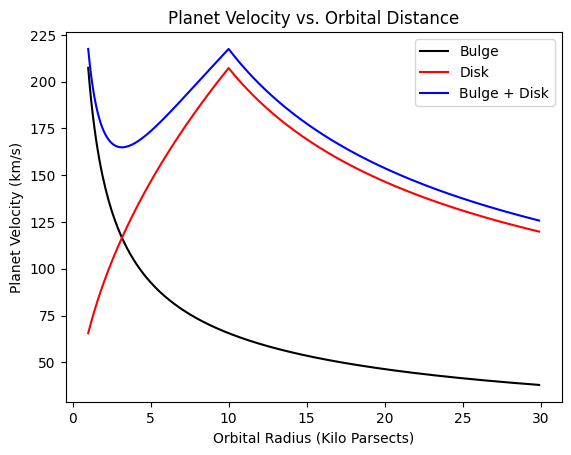

In [915]:
#Creating a graph with all previous plots combined
plt.plot(orbital_distance.to(u.kpc), v_Bulge_kParsects.to(u.km/u.s), color="black", label="Bulge")
plt.plot(orbital_distance.to(u.kpc), vDisk.to(u.km/u.s), color="red", label="Disk")
plt.plot(orbital_distance.to(u.kpc), vBulgeDisk.to(u.km/u.s), color="blue", label="Bulge + Disk")
plt.xlabel('Orbital Radius (Kilo Parsects)') # Add x axis label
plt.ylabel('Planet Velocity (km/s)') # Add y axis label
plt.title('Planet Velocity vs. Orbital Distance') # Add title
plt.legend() #Shows the legend of color meanings
plt.show() # Displays graph

In [916]:
#Defining constants like
M_Halo = 1.9*1e11 * u.solMass
r = 30 * u.kpc
#Checking for orrect units
print(r)
print(M_Halo)
# Defining the Density of the halo & printing for correct units
densityOfHalo = M_Halo / (4/3 * np.pi * (r**3))
print(densityOfHalo)

#Defining function to calculate enclosed mass of the halo given a radius
def Calc_Enclosed_Mass_Halo(r, density=densityOfHalo):
  M_Halo = 4/3 * np.pi * density * (r**3)
  #print(M_Halo)
  return (M_Halo)

30.0 kpc
190000000000.0 solMass
1679968.8437477844 solMass / kpc3


In [917]:
M_DarkMatter = 5e9 * u.solMass
densityOfDarkMatter = M_DarkMatter / (4/3 * np.pi * (r**3))

def Calc_Enclosed_Mass_DarkMatter(r, density=densityOfDarkMatter):
  M_DarkMatter = 4/3 * np.pi * density * (r**3)
  return (M_DarkMatter)

#print(Calc_Enclosed_Mass_Disk(orbital_distance[1]))
mass_dark_matter = Calc_Enclosed_Mass_DarkMatter(1)
#print(mass_dark_matter)
#This code is used to calculate the enclosed mass in a galaxy
"""
This area of the code is currently broken due to trying to add dark matter
something is off when trying to add the units of the mass
"""
def Calc_Enclosed_Mass_Galaxy(r, density=318 * 1e6 * u.solMass/u.kpc**2, M_Bulge=7.5e9 * u.solMass, densityHalo=1.5 * 1e12 * u.solMass):
  M_disk = Calc_Enclosed_Mass_Disk(r, density=densityOfDisk)
  M_Halo = Calc_Enclosed_Mass_Halo(r)
  M_DarkMatter = Calc_Enclosed_Mass_DarkMatter(r)
  M_galaxy = M_Bulge + M_disk + M_Halo + 5.4e10 * u.solMass #M_DarkMatter
  return (M_galaxy)


In [918]:

# Creating arrays of zeros as temporary place holder until calculations are completed
M_disk = np.zeros(len(orbital_distance)) * u.solMass
M_BulgeDisk = np.zeros(len(orbital_distance)) * u.solMass
M_Halo = np.zeros(len(orbital_distance)) * u.solMass
M_galaxy = np.zeros(len(orbital_distance)) * u.solMass

#Calculates and fills out arrays using a loop
for i in range(len(orbital_distance)):
  M_disk[i] = Calc_Enclosed_Mass_Disk(orbital_distance[i])
  M_BulgeDisk[i] = Calc_Enclosed_Mass_BulgeDisk(orbital_distance[i])
  M_Halo[i] = Calc_Enclosed_Mass_Halo(orbital_distance[i])
  M_galaxy[i] = Calc_Enclosed_Mass_Galaxy(orbital_distance[i])

#Calc the orbital velocities of all situations
vDisk = calcOrbitV(M_disk,orbital_distance)
vBulgeDisk = calcOrbitV(M_BulgeDisk,orbital_distance)
vHalo = calcOrbitV(M_Halo,orbital_distance)
vGalaxy = calcOrbitV(M_galaxy,orbital_distance)

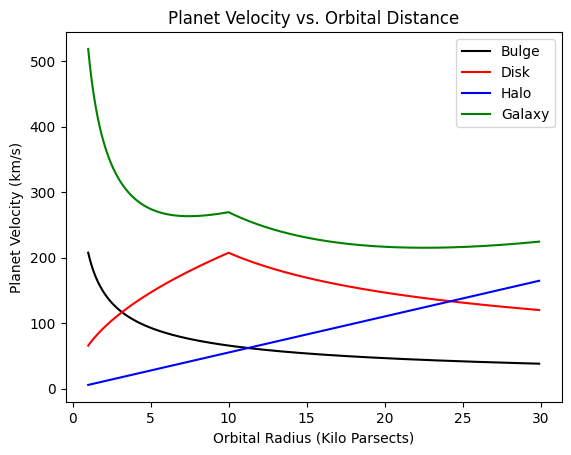

In [920]:
#Creating all plots and graphing
plt.plot(orbital_distance.to(u.kpc), v_Bulge_kParsects.to(u.km/u.s), color="black", label="Bulge")
plt.plot(orbital_distance.to(u.kpc), vDisk.to(u.km/u.s), color="red", label="Disk")
plt.plot(orbital_distance.to(u.kpc), vHalo.to(u.km/u.s), color="blue", label="Halo")
plt.plot(orbital_distance.to(u.kpc), vGalaxy.to(u.km/u.s), color="green", label="Galaxy")
plt.xlabel('Orbital Radius (Kilo Parsects)') # Add x axis label
plt.ylabel('Planet Velocity (km/s)') # Add y axis label
plt.title('Planet Velocity vs. Orbital Distance') # Add title
plt.legend() #Shows the legend of color meanings
plt.show() # Displays graph

In [921]:
# Code given to us to reference data from Dr.Wang
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (27).txt


In [922]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

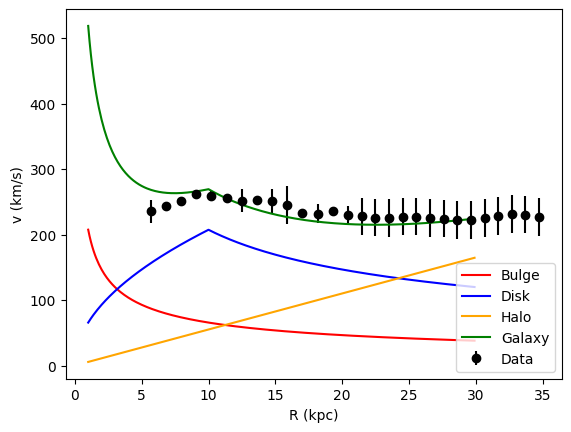

In [923]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(orbital_distance.to(u.kpc), v_Bulge_kParsects.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(orbital_distance.to(u.kpc), vDisk.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(orbital_distance.to(u.kpc), vHalo.to(u.km/u.s), color="orange", label="Halo")
plt.plot(orbital_distance.to(u.kpc), vGalaxy.to(u.km/u.s), color="green", label="Galaxy")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend(loc = 'lower right') # to show the legend of a figure
plt.show()